## 1. Data

Lending Club 2016年Q3数据：https://www.lendingclub.com/info/download-data.action

参考：http://kldavenport.com/lending-club-data-analysis-revisted-with-python/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("./LoanStats_2016Q3.csv",skiprows=1,low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99124 entries, 0 to 99123
Columns: 122 entries, id to sec_app_mths_since_last_major_derog
dtypes: float64(97), object(25)
memory usage: 92.3+ MB


In [4]:
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,NaN,NaN,15000.0,15000.0,15000.0,36 months,13.99%,512.60,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2600.0,2600.0,2600.0,36 months,8.99%,82.67,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,32200.0,32200.0,32200.0,60 months,21.49%,880.02,D,D5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Keep what we need

In [5]:
# .ix[row slice, column slice] 
df.ix[:4,:7]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate
0,NaN,NaN,15000.0,15000.0,15000.0,36 months,13.99%
1,NaN,NaN,2600.0,2600.0,2600.0,36 months,8.99%
2,NaN,NaN,32200.0,32200.0,32200.0,60 months,21.49%
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,11.49%
4,NaN,NaN,6000.0,6000.0,6000.0,36 months,13.49%


In [6]:
df.drop('id',1,inplace=True)
df.drop('member_id',1,inplace=True)

In [7]:
df.int_rate = pd.Series(df.int_rate).str.replace('%', '').astype(float)

In [8]:
df.ix[:4,:7]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade
0,15000.0,15000.0,15000.0,36 months,13.99,512.60,C
1,2600.0,2600.0,2600.0,36 months,8.99,82.67,B
2,32200.0,32200.0,32200.0,60 months,21.49,880.02,D
3,10000.0,10000.0,10000.0,36 months,11.49,329.72,B
4,6000.0,6000.0,6000.0,36 months,13.49,203.59,C


### Loan Amount Requested Verus the Funded Amount

In [9]:
print (df.loan_amnt != df.funded_amnt).value_counts()

False    99120
True         4
dtype: int64


In [10]:
df.query('loan_amnt != funded_amnt').head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
99120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.dropna(axis=0, how='all',inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99120 entries, 0 to 99119
Columns: 120 entries, loan_amnt to sec_app_mths_since_last_major_derog
dtypes: float64(97), object(23)
memory usage: 91.5+ MB


In [13]:
df.dropna(axis=1, how='all',inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99120 entries, 0 to 99119
Columns: 108 entries, loan_amnt to total_il_high_credit_limit
dtypes: float64(85), object(23)
memory usage: 82.4+ MB


In [15]:
df.ix[:5,8:15]

,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status
0,Fiscal Director,2 years,RENT,55000.0,Not Verified,Sep-16,Current
1,Loaner Coordinator,3 years,RENT,35000.0,Source Verified,Sep-16,Fully Paid
2,warehouse/supervisor,10+ years,MORTGAGE,65000.0,Not Verified,Sep-16,Fully Paid
3,Teacher,10+ years,OWN,55900.0,Not Verified,Sep-16,Current
4,SERVICE MGR,5 years,RENT,33000.0,Not Verified,Sep-16,Current
5,General Manager,10+ years,MORTGAGE,109000.0,Source Verified,Sep-16,Current


### emp_title: employment title

In [16]:
print df.emp_title.value_counts().head()
print df.emp_title.value_counts().tail()
df.emp_title.unique().shape

Teacher       1931
Manager       1701
Owner          990
Supervisor     785
Driver         756
Name: emp_title, dtype: int64
Agent Services Representative           1
Operator Bridge Tunnel                  1
Reg Medical Assistant/Referral Spec.    1
Home Health Care                        1
rounds cook                             1
Name: emp_title, dtype: int64


(37421,)

In [17]:
df.drop(['emp_title'],1, inplace=True)

In [18]:
df.ix[:5,8:15]

,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan
0,2 years,RENT,55000.0,Not Verified,Sep-16,Current,n
1,3 years,RENT,35000.0,Source Verified,Sep-16,Fully Paid,n
2,10+ years,MORTGAGE,65000.0,Not Verified,Sep-16,Fully Paid,n
3,10+ years,OWN,55900.0,Not Verified,Sep-16,Current,n
4,5 years,RENT,33000.0,Not Verified,Sep-16,Current,n
5,10+ years,MORTGAGE,109000.0,Source Verified,Sep-16,Current,n


### emp_length: employment length

In [19]:
df.emp_length.value_counts()

10+ years    34219
2 years       9066
3 years       7925
< 1 year      7104
1 year        6991
5 years       6170
4 years       6022
n/a           5922
6 years       4406
8 years       4168
9 years       3922
7 years       3205
Name: emp_length, dtype: int64

In [20]:
df.replace('n/a', np.nan,inplace=True)
df.emp_length.fillna(value=0,inplace=True)
df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df['emp_length'] = df['emp_length'].astype(int)

In [21]:
df.emp_length.value_counts()

10    34219
1     14095
2      9066
3      7925
5      6170
4      6022
0      5922
6      4406
8      4168
9      3922
7      3205
Name: emp_length, dtype: int64

### verification status:"Indicates if income was verified by LC, not verified, or if the income source was verified"

In [22]:
df.verification_status.value_counts()

Source Verified    40781
Verified           31356
Not Verified       26983
Name: verification_status, dtype: int64

### Target: Loan Statuses

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99120 entries, 0 to 99119
Columns: 107 entries, loan_amnt to total_il_high_credit_limit
dtypes: float64(85), int64(1), object(21)
memory usage: 81.7+ MB


In [24]:
df.columns

Index([u'loan_amnt', u'funded_amnt', u'funded_amnt_inv', u'term', u'int_rate',
       u'installment', u'grade', u'sub_grade', u'emp_length',
       u'home_ownership',
       ...
       u'num_tl_90g_dpd_24m', u'num_tl_op_past_12m', u'pct_tl_nvr_dlq',
       u'percent_bc_gt_75', u'pub_rec_bankruptcies', u'tax_liens',
       u'tot_hi_cred_lim', u'total_bal_ex_mort', u'total_bc_limit',
       u'total_il_high_credit_limit'],
      dtype='object', length=107)

In [25]:
pd.unique(df['loan_status'].values.ravel())

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'Charged Off',
       'Late (16-30 days)', 'In Grace Period', 'Default'], dtype=object)

In [26]:
for col in df.select_dtypes(include=['object']).columns:
    print ("Column {} has {} unique instances".format( col, len(df[col].unique())) )

Column term has 2 unique instances
Column grade has 7 unique instances
Column sub_grade has 35 unique instances
Column home_ownership has 4 unique instances
Column verification_status has 3 unique instances
Column issue_d has 3 unique instances
Column loan_status has 7 unique instances
Column pymnt_plan has 2 unique instances
Column desc has 6 unique instances
Column purpose has 13 unique instances
Column title has 13 unique instances
Column zip_code has 873 unique instances
Column addr_state has 50 unique instances
Column earliest_cr_line has 614 unique instances
Column revol_util has 1087 unique instances
Column initial_list_status has 2 unique instances
Column last_pymnt_d has 13 unique instances
Column next_pymnt_d has 4 unique instances
Column last_credit_pull_d has 14 unique instances
Column application_type has 3 unique instances
Column verification_status_joint has 2 unique instances


In [27]:
# 处理对象类型的缺失，unique
df.select_dtypes(include=['O']).describe().T.\
assign(missing_pct=df.apply(lambda x : (len(x)-x.count())/float(len(x))))

,count,unique,top,freq,missing_pct
term,99120,2,36 months,73898,0.000000
grade,99120,7,C,32846,0.000000
sub_grade,99120,35,B5,8322,0.000000
home_ownership,99120,4,MORTGAGE,46761,0.000000
verification_status,99120,3,Source Verified,40781,0.000000
issue_d,99120,3,Aug-16,36280,0.000000
loan_status,99120,7,Current,79445,0.000000
pymnt_plan,99120,2,n,99074,0.000000
desc,6,5,,2,0.999939
purpose,99120,13,debt_consolidation,57682,0.000000


In [28]:
df.revol_util = pd.Series(df.revol_util).str.replace('%', '').astype(float)

In [29]:
# missing_pct
df.drop('desc',1,inplace=True)
df.drop('verification_status_joint',1,inplace=True)

In [30]:
df.drop('zip_code',1,inplace=True)
df.drop('addr_state',1,inplace=True)
df.drop('earliest_cr_line',1,inplace=True)
df.drop('revol_util',1,inplace=True)
df.drop('purpose',1,inplace=True)
df.drop('title',1,inplace=True)
df.drop('term',1,inplace=True)
df.drop('issue_d',1,inplace=True)
# df.drop('',1,inplace=True)
# 贷后相关的字段
df.drop(['out_prncp','out_prncp_inv','total_pymnt',
         'total_pymnt_inv','total_rec_prncp', 'grade', 'sub_grade'] ,1, inplace=True)
df.drop(['total_rec_int','total_rec_late_fee',
         'recoveries','collection_recovery_fee',
         'collection_recovery_fee' ],1, inplace=True)
df.drop(['last_pymnt_d','last_pymnt_amnt',
         'next_pymnt_d','last_credit_pull_d'],1, inplace=True)
df.drop(['policy_code'],1, inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99120 entries, 0 to 99119
Data columns (total 81 columns):
loan_amnt                         99120 non-null float64
funded_amnt                       99120 non-null float64
funded_amnt_inv                   99120 non-null float64
int_rate                          99120 non-null float64
installment                       99120 non-null float64
emp_length                        99120 non-null int64
home_ownership                    99120 non-null object
annual_inc                        99120 non-null float64
verification_status               99120 non-null object
loan_status                       99120 non-null object
pymnt_plan                        99120 non-null object
dti                               99120 non-null float64
delinq_2yrs                       99120 non-null float64
inq_last_6mths                    99120 non-null float64
mths_since_last_delinq            53366 non-null float64
mths_since_last_record            19792 no

In [32]:
df.ix[:5,:10]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status
0,15000.0,15000.0,15000.0,13.99,512.60,2,RENT,55000.0,Not Verified,Current
1,2600.0,2600.0,2600.0,8.99,82.67,3,RENT,35000.0,Source Verified,Fully Paid
2,32200.0,32200.0,32200.0,21.49,880.02,10,MORTGAGE,65000.0,Not Verified,Fully Paid
3,10000.0,10000.0,10000.0,11.49,329.72,10,OWN,55900.0,Not Verified,Current
4,6000.0,6000.0,6000.0,13.49,203.59,5,RENT,33000.0,Not Verified,Current
5,30000.0,30000.0,30000.0,13.99,697.90,10,MORTGAGE,109000.0,Source Verified,Current


In [33]:
df.ix[:5,10:21]

,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,initial_list_status
0,n,23.78,1.0,0.0,7.0,NaN,22.0,0.0,21345.0,43.0,f
1,n,6.73,0.0,0.0,NaN,NaN,14.0,0.0,720.0,24.0,w
2,n,11.71,0.0,1.0,NaN,87.0,17.0,1.0,11987.0,34.0,w
3,n,26.21,0.0,2.0,NaN,NaN,15.0,0.0,17209.0,62.0,w
4,n,19.05,0.0,0.0,NaN,NaN,3.0,0.0,4576.0,11.0,f
5,n,16.24,0.0,0.0,NaN,NaN,17.0,0.0,11337.0,39.0,w


In [34]:
print df.columns
print df.head(1).values
df.info()

Index([u'loan_amnt', u'funded_amnt', u'funded_amnt_inv', u'int_rate',
       u'installment', u'emp_length', u'home_ownership', u'annual_inc',
       u'verification_status', u'loan_status', u'pymnt_plan', u'dti',
       u'delinq_2yrs', u'inq_last_6mths', u'mths_since_last_delinq',
       u'mths_since_last_record', u'open_acc', u'pub_rec', u'revol_bal',
       u'total_acc', u'initial_list_status', u'collections_12_mths_ex_med',
       u'mths_since_last_major_derog', u'application_type',
       u'annual_inc_joint', u'dti_joint', u'acc_now_delinq', u'tot_coll_amt',
       u'tot_cur_bal', u'open_acc_6m', u'open_il_6m', u'open_il_12m',
       u'open_il_24m', u'mths_since_rcnt_il', u'total_bal_il', u'il_util',
       u'open_rv_12m', u'open_rv_24m', u'max_bal_bc', u'all_util',
       u'total_rev_hi_lim', u'inq_fi', u'total_cu_tl', u'inq_last_12m',
       u'acc_open_past_24mths', u'avg_cur_bal', u'bc_open_to_buy', u'bc_util',
       u'chargeoff_within_12_mths', u'delinq_amnt', u'mo_sin_old_il_a

In [35]:
df.select_dtypes(include=['float']).describe().T.\
assign(missing_pct=df.apply(lambda x : (len(x)-x.count())/float(len(x))))

/Users/ting/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max,missing_pct
loan_amnt,99120.0,14170.570521,8886.138758,1000.00,7200.00,12000.00,20000.00,40000.00,0.000000
funded_amnt,99120.0,14170.570521,8886.138758,1000.00,7200.00,12000.00,20000.00,40000.00,0.000000
funded_amnt_inv,99120.0,14166.087823,8883.301328,1000.00,7200.00,12000.00,20000.00,40000.00,0.000000
int_rate,99120.0,13.723641,4.873910,5.32,10.49,12.79,15.59,30.99,0.000000
installment,99120.0,432.718654,272.678596,30.12,235.24,361.38,569.83,1535.71,0.000000
annual_inc,99120.0,78488.850081,72694.186060,0.00,48000.00,65448.00,94000.00,8400000.00,0.000000
dti,99120.0,18.348651,64.057603,0.00,11.91,17.60,23.90,9999.00,0.000000
delinq_2yrs,99120.0,0.381901,0.988996,0.00,0.00,0.00,0.00,21.00,0.000000
inq_last_6mths,99120.0,0.570521,0.863796,0.00,0.00,0.00,1.00,5.00,0.000000
mths_since_last_delinq,53366.0,33.229172,21.820407,0.00,NaN,NaN,NaN,142.00,0.461602


In [36]:
df.drop('annual_inc_joint',1,inplace=True)
df.drop('dti_joint',1,inplace=True)

In [37]:
df.select_dtypes(include=['int']).describe().T.\
assign(missing_pct=df.apply(lambda x : (len(x)-x.count())/float(len(x))))

,count,mean,std,min,25%,50%,75%,max,missing_pct
emp_length,99120.0,5.757092,3.770359,0.0,2.0,6.0,10.0,10.0,0.0


### Target: Loan Statuses

In [38]:
df['loan_status'].value_counts()
# .plot(kind='bar')

Current               79445
Fully Paid            13066
Charged Off            2502
Late (31-120 days)     2245
In Grace Period        1407
Late (16-30 days)       454
Default                   1
Name: loan_status, dtype: int64

In [39]:
df.loan_status.replace('Fully Paid', int(1),inplace=True)
df.loan_status.replace('Current', int(1),inplace=True)
df.loan_status.replace('Late (16-30 days)', int(0),inplace=True)
df.loan_status.replace('Late (31-120 days)', int(0),inplace=True)
df.loan_status.replace('Charged Off', np.nan,inplace=True)
df.loan_status.replace('In Grace Period', np.nan,inplace=True)
df.loan_status.replace('Default', np.nan,inplace=True)
# df.loan_status.astype('int')
df.loan_status.value_counts()

1.0    92511
0.0     2699
Name: loan_status, dtype: int64

In [40]:
# df.loan_status
df.dropna(subset=['loan_status'],inplace=True)

### Highly Correlated Data

In [41]:
cor = df.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.55) | (cor < -0.55)]

funded_amnt                     loan_amnt                      1.000000
funded_amnt_inv                 loan_amnt                      0.999994
                                funded_amnt                    0.999994
installment                     loan_amnt                      0.953380
                                funded_amnt                    0.953380
                                funded_amnt_inv                0.953293
mths_since_last_delinq          delinq_2yrs                   -0.551275
total_acc                       open_acc                       0.722950
mths_since_last_major_derog     mths_since_last_delinq         0.685642
open_il_24m                     open_il_12m                    0.760219
total_bal_il                    open_il_6m                     0.566551
open_rv_12m                     open_acc_6m                    0.623975
open_rv_24m                     open_rv_12m                    0.774954
max_bal_bc                      revol_bal                      0

In [42]:
df.drop(['funded_amnt','funded_amnt_inv', 'installment'], axis=1, inplace=True)

## 2. Our Model

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.preprocessing import OneHotEncoder #https://ljalphabeta.gitbooks.io/python-/content/categorical_data.html

In [43]:
Y = df.loan_status
X = df.drop('loan_status',1,inplace=False)

In [53]:
print Y.shape
print sum(Y)

(95210,)
92511.0


In [56]:
X = pd.get_dummies(X)

In [57]:
print X.columns
print X.head(1).values
X.info()

Index([u'loan_amnt', u'int_rate', u'emp_length', u'annual_inc', u'dti',
       u'delinq_2yrs', u'inq_last_6mths', u'mths_since_last_delinq',
       u'mths_since_last_record', u'open_acc', u'pub_rec', u'revol_bal',
       u'total_acc', u'collections_12_mths_ex_med',
       u'mths_since_last_major_derog', u'acc_now_delinq', u'tot_coll_amt',
       u'tot_cur_bal', u'open_acc_6m', u'open_il_6m', u'open_il_12m',
       u'open_il_24m', u'mths_since_rcnt_il', u'total_bal_il', u'il_util',
       u'open_rv_12m', u'open_rv_24m', u'max_bal_bc', u'all_util',
       u'total_rev_hi_lim', u'inq_fi', u'total_cu_tl', u'inq_last_12m',
       u'acc_open_past_24mths', u'avg_cur_bal', u'bc_open_to_buy', u'bc_util',
       u'chargeoff_within_12_mths', u'delinq_amnt', u'mo_sin_old_il_acct',
       u'mo_sin_old_rev_tl_op', u'mo_sin_rcnt_rev_tl_op', u'mo_sin_rcnt_tl',
       u'mort_acc', u'mths_since_recent_bc', u'mths_since_recent_bc_dlq',
       u'mths_since_recent_inq', u'mths_since_recent_revol_delinq',
  

In [58]:
X.fillna(0.0,inplace=True)
X.fillna(0,inplace=True)

### Train Data & Test Data

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=123)

In [60]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(66647, 84)
(66647,)
(28563, 84)
(28563,)


In [61]:
print y_train.value_counts()
print y_test.value_counts()

1.0    64712
0.0     1935
Name: loan_status, dtype: int64
1.0    27799
0.0      764
Name: loan_status, dtype: int64


### Gradient Boosting Regression Tree

In [102]:
# param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
#               'max_depth': [1,2,3,4],
#               'min_samples_split': [50,100,200,400],
#               'n_estimators': [100,200,400,800]
#               }

param_grid = {'learning_rate': [0.1],
              'max_depth': [2],
              'min_samples_split': [50,100],
              'n_estimators': [100,200]
              }
# param_grid = {'learning_rate': [0.1],
#               'max_depth': [4],
#               'min_samples_leaf': [3],
#               'max_features': [1.0],
#               }

est = GridSearchCV(ensemble.GradientBoostingRegressor(),
                   param_grid, n_jobs=4, refit=True)

est.fit(x_train, y_train)

best_params = est.best_params_
print best_params

In [103]:
print best_params

{'min_samples_split': 100, 'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3}


In [109]:
%%time
est = ensemble.GradientBoostingRegressor(min_samples_split=50,n_estimators=300,
                                         learning_rate=0.1,max_depth=1, random_state=0,loss='ls').\
fit(x_train, y_train)

CPU times: user 24.2 s, sys: 251 ms, total: 24.4 s
Wall time: 25.6 s


In [110]:
est.score(x_test,y_test)

0.028311715416075908

In [106]:
%%time
est = ensemble.GradientBoostingRegressor(min_samples_split=50,n_estimators=100,
                                         learning_rate=0.1,max_depth=2, random_state=0,loss='ls').\
fit(x_train, y_train)

CPU times: user 20 s, sys: 272 ms, total: 20.3 s
Wall time: 21.6 s


In [107]:
est.score(x_test,y_test)

0.029210266192750467

In [89]:
def compute_ks(data):

    sorted_list = data.sort_values(['predict'], ascending=[True])

    total_bad = sorted_list['label'].sum(axis=None, skipna=None, level=None, numeric_only=None) / 3
    total_good = sorted_list.shape[0] - total_bad

    # print "total_bad = ", total_bad
    # print "total_good = ", total_good

    max_ks = 0.0
    good_count = 0.0
    bad_count = 0.0
    for index, row in sorted_list.iterrows():
        if row['label'] == 3:
            bad_count += 1.0
        else:
            good_count += 1.0

        val = bad_count/total_bad - good_count/total_good
        max_ks = max(max_ks, val)

    return max_ks

In [99]:
test_pd = pd.DataFrame()
test_pd['predict'] = est.predict(x_test)
test_pd['label'] = y_test
# df['predict'] = est.predict(x_test)
print compute_ks(test_pd[['label','predict']])

0.0


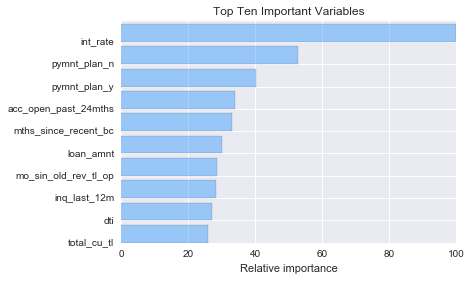

In [101]:
# Top Ten
feature_importance = est.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

indices = np.argsort(feature_importance)[-10:]
plt.barh(np.arange(10), feature_importance[indices],color='dodgerblue',alpha=.4)
plt.yticks(np.arange(10 + 0.25), np.array(X.columns)[indices])
_ = plt.xlabel('Relative importance'), plt.title('Top Ten Important Variables')

### Other Model

In [108]:
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor

0.973252109372
0.0
[ 0.          0.30769232  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.05128205
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.05128205  0.30769232  0.2820513   0.          0.          0.          0.
  0.        ]


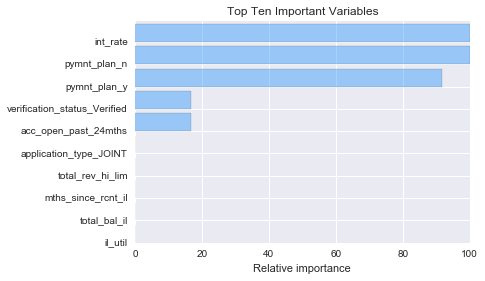

In [123]:
# XGBoost
clf2 = xgb.XGBClassifier(n_estimators=50, max_depth=1, 
                            learning_rate=0.01, subsample=0.8, colsample_bytree=0.3,scale_pos_weight=3.0, 
                             silent=True, nthread=-1, seed=0, missing=None,objective='binary:logistic', 
                             reg_alpha=1, reg_lambda=1, 
                             gamma=0, min_child_weight=1, 
                             max_delta_step=0,base_score=0.5)

clf2.fit(x_train, y_train)
print clf2.score(x_test, y_test)
test_pd2 = pd.DataFrame()
test_pd2['predict'] = clf2.predict(x_test)
test_pd2['label'] = y_test
print compute_ks(test_pd[['label','predict']])
print clf2.feature_importances_
# Top Ten
feature_importance = clf2.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

indices = np.argsort(feature_importance)[-10:]
plt.barh(np.arange(10), feature_importance[indices],color='dodgerblue',alpha=.4)
plt.yticks(np.arange(10 + 0.25), np.array(X.columns)[indices])
_ = plt.xlabel('Relative importance'), plt.title('Top Ten Important Variables')

0.0148713087517
0.0
[ 0.02588781  0.10778862  0.00734994  0.02090219  0.02231172  0.00778016
  0.00556834  0.01097013  0.00734689  0.0017027   0.00622544  0.01140843
  0.00530896  0.00031185  0.01135318  0.          0.01488991  0.01840559
  0.00585621  0.00652523  0.0066759   0.00727607  0.00955013  0.01004672
  0.01785864  0.00855197  0.00985739  0.01477432  0.02184904  0.01816184
  0.00878854  0.02078236  0.01310288  0.00844302  0.01596395  0.01825196
  0.01817367  0.00297759  0.00084823  0.02808718  0.02917066  0.00897034
  0.01139324  0.01532409  0.01467681  0.0032855   0.01066291  0.00581661
  0.00955357  0.00417743  0.01333577  0.00489264  0.0128039   0.01340195
  0.01286394  0.01619219  0.00395603  0.00508973  0.          0.00234757
  0.00378329  0.00502684  0.01732834  0.01178674  0.00030035  0.01189509
  0.00942532  0.00841645  0.01571355  0.00288054  0.          0.0011667
  0.00106548  0.00488734  0.          0.00200132  0.00062765  0.04130873
  0.10076558  0.00022293  0.0016

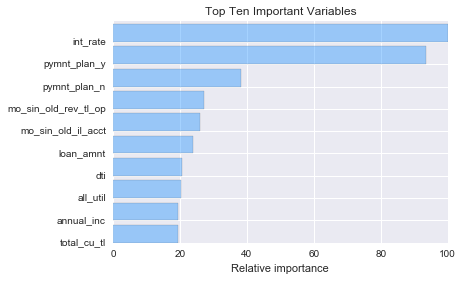

In [124]:
# RFR
clf3 = RandomForestRegressor(n_jobs=-1, max_depth=10,random_state=0)
clf3.fit(x_train, y_train)
print clf3.score(x_test, y_test)
test_pd3 = pd.DataFrame()
test_pd3['predict'] = clf3.predict(x_test)
test_pd3['label'] = y_test
print compute_ks(test_pd[['label','predict']])
print clf3.feature_importances_
# Top Ten
feature_importance = clf3.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

indices = np.argsort(feature_importance)[-10:]
plt.barh(np.arange(10), feature_importance[indices],color='dodgerblue',alpha=.4)
plt.yticks(np.arange(10 + 0.25), np.array(X.columns)[indices])
_ = plt.xlabel('Relative importance'), plt.title('Top Ten Important Variables')

0.020808034579
0.0
[ 0.00950112  0.17496689  0.00476969  0.00538677  0.00898343  0.01604885
  0.0139889   0.00605683  0.0042762   0.00358536  0.0144985   0.00915189
  0.00643305  0.00637134  0.0050764   0.00218012  0.00925068  0.00363339
  0.00988441  0.00645297  0.00662444  0.00934969  0.00739012  0.00635592
  0.00633908  0.00923972  0.01263829  0.01190224  0.00914159  0.00402144
  0.00917841  0.01456563  0.01161155  0.01097394  0.00506868  0.00772159
  0.00560163  0.01132941  0.00172528  0.0085601   0.01282485  0.00970629
  0.00956066  0.00731205  0.02087289  0.00430205  0.0062769   0.00765693
  0.00922104  0.00296456  0.00563208  0.00459181  0.0133819   0.00548208
  0.00450864  0.0132415   0.00677772  0.00509891  0.00108962  0.00578448
  0.00934323  0.00715127  0.01078137  0.00855071  0.00695096  0.01488993
  0.00317962  0.00485367  0.00476553  0.00509674  0.          0.00733654
  0.00097223  0.00380448  0.00534715  0.00356893  0.0128526   0.11944538
  0.11758343  0.00195945  0.0022

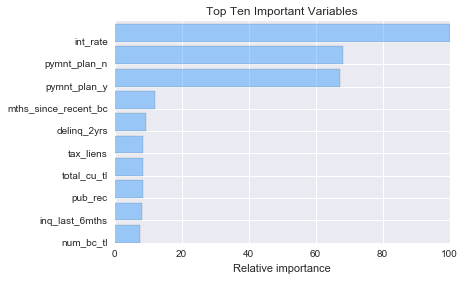

In [125]:
# XTR
clf4 = ExtraTreesRegressor(n_jobs=-1, max_depth=10,random_state=0)
clf4.fit(x_train, y_train)
print clf4.score(x_test, y_test)
test_pd4 = pd.DataFrame()
test_pd4['predict'] = clf4.predict(x_test)
test_pd4['label'] = y_test
print compute_ks(test_pd[['label','predict']])
print clf4.feature_importances_
# Top Ten
feature_importance = clf4.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

indices = np.argsort(feature_importance)[-10:]
plt.barh(np.arange(10), feature_importance[indices],color='dodgerblue',alpha=.4)
plt.yticks(np.arange(10 + 0.25), np.array(X.columns)[indices])
_ = plt.xlabel('Relative importance'), plt.title('Top Ten Important Variables')

## 作业：stacking